In [2]:
import matplotlib.pyplot as plt
from cpca import transform as tf

In [5]:
tf(['四川成都双流'])

,省,市,区,地址,adcode
0,四川省,成都市,None,双流,510100


In [11]:
def Match_Address(data):
    import re
    PATTERN1 = r'([\u4e00-\u9fa5]{2,5}?(?:省|自治区)){0,1}([\u4e00-\u9fa5]{2,7}?(?:州|自治州|市)){0,1}([\u4e00-\u9fa5]{2,7}?(?:区|县|自治县)){0,1}([\u4e00-\u9fa5]{2,7}?(?:镇|村|街|街道)){0,1}([\d]{1,3}?(号)){0,1}'
    # \u4e00-\u9fa5 匹配任何中文
    # {2,5} 匹配2到5次
    # ? 前面可不匹配
    # (?:pattern) 如industr(?:y|ies) 就是一个比 'industry|industries' 更简略的表达式。意思就是说括号里面的内容是一个整体是以y或者ies结尾的单词
    pattern = re.compile(PATTERN1)
    p1 = ''
    p2 = ''
    p3 = ''
    p4 = ''
    p5 = ''
    p6 = ''
    m = pattern.search(data)
    if not m:
        print('None')
    if m.lastindex >= 1:
        p1 = m.group(1)
    if m.lastindex >= 2:
        p2 = m.group(2)
    if m.lastindex >= 3:
        p3 = m.group(3)
    if m.lastindex >= 4:
        p4 = m.group(4)
    if m.lastindex >= 5:
        p5 = m.group(5)
    if m.lastindex >= 6:
        p6 = m.group(6)
    out = '%s|%s|%s|%s|%s|%s' % (p1, p2, p3, p4, p5, p6)
    return out

data=str(input("请输入文本:"))
out=Match_Address(data)
print(out)

None|达州市|市中区|||


In [69]:
from pypinyin import lazy_pinyin as lpy, Style
# style = Style.TONE3
str = ''
ini = lpy(str,style=Style.INITIALS)[0]
print(ini)
yun = lpy(str,style=Style.NORMAL)[0].replace(ini,'')
print(yun)
tone = lpy(str,style=Style.TONE3)[0][-1]
print(tone)

IndexError: list index out of range

In [70]:
from pywubi import wubi as wb
wb('又')

['cccc']

In [15]:
import jieba
str = "四川省成都市双流区四川大学江安校区"
strJieba = jieba.cut(str,cut_all=False)
print('/'.join(strJieba))

四川省/成都市/双流/区/四川大学/江安/校区


In [3]:
import dbf

table = dbf.Table(filename=r'F:\SCU\大创\地理信息数据\h47c004004\aanp.dbf',codepage='cp936')
table.open(mode=dbf.READ_WRITE)
for row in table:
    print(row.NAME)

热圾拉达                                                    
丢丢沟                                                      
大湾沟                                                      
罗蒙洛姑                                                    
三锅桩-金子沟村                                             
依吉沟                                                      
腊坡山                                                      
呷罗沟                                                      
元宝山                                                      
水落河                                                      
雅砻江（大金河）                                            
白马-银厂乡                                                 
蚂蟥沟                                                      
卢塞拉达河                                                  
蚕宁路                                                      
锄头湾-白碉乡                                               
甘尔奕莫                                                    
丁冬沟                              

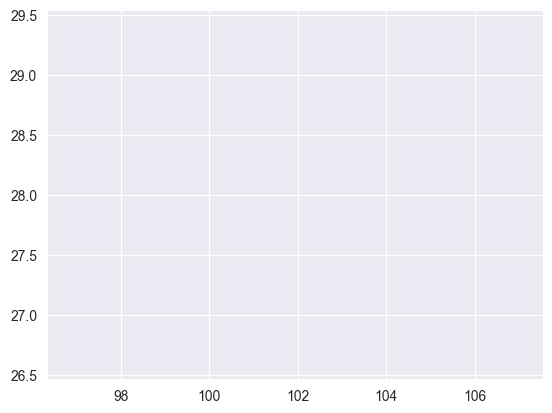

In [18]:
import shapefile
import matplotlib.pyplot as plt

sf = shapefile.Reader(r'F:\SCU\大创\地理信息数据\h47c004004\aanp')
shapes = sf.shapes()
pts = shapes[0].points
prt = shapes[0].parts

x,y = zip(*pts)

fig = plt.Figure()
plt.plot(x,y,'-',lw=1,color='k')
plt.show()